In [10]:
!git config user.email "naazshafeer@gmail.com"
!git config user.name "Naaz Shafeer"

Test for AGN.FITS file

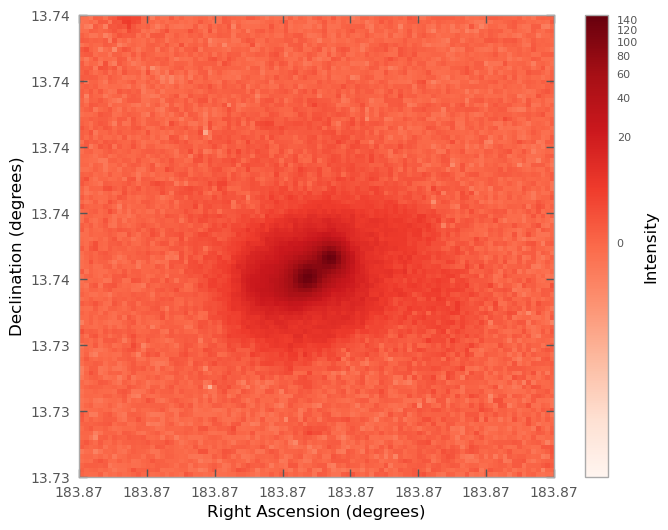

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm

plt.style.use(astropy_mpl_style)


fits_image_filename = 'FITS FILES/agn.fits'


with fits.open(fits_image_filename) as hdul:
    image_data = hdul[0].data
    wcs = WCS(hdul[0].header)


ysize, xsize = image_data.shape

xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


fig, ax = plt.subplots()


extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
norm = simple_norm(image_data, stretch='log', power = 2.0, asinh_a= 0.22, min_cut = -5, max_cut=150)
im = ax.imshow(image_data, cmap='Reds', norm=norm, origin='upper', aspect='equal', extent=extent)


x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


ax.set_xlabel('Right Ascension (degrees)', fontsize=12)  # Specify font size for x-axis label
ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
ax.grid(False)



cbar = plt.colorbar(im, ax = ax, label='Intensity')
cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


plt.show()



This is the trials for fixing the scale issues and mostly the axes (RA and ticksmarks) issues

In [18]:
from astropy.io import fits


fits_image_filename = 'agn.fits'
f = fits.open(fits_image_filename)


print(f[0].header)


wcs = WCS(f[0].header)

print("Ref Pixel", wcs.wcs.crpix)
print("Coord Value at Ref PIxel", wcs.wcs.crval)
print("Pixel Scale", wcs.wcs.cdelt)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                  100 / Axis length                                    NAXIS2  =                  100 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2020-10-23T22:16:16' / Date FITS file was generated                  IRAF-TLM= '2020-10-23T22:16:13' / Time of last modification                     OBJECT  = 'J1215+1344'         / Name of the object observed                    EQUINOX =        2000.00000000 / Mean equinox                                   MJD-OBS =   5.890100000000E+04 / [d] MJD of observation                         RADESYS = 'ICRS    '           / Equator

/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_30839/2799984724.py:15: RuntimeWarning: cdelt will be ignored since cd is present
  print("Pixel Scale", wcs.wcs.cdelt)


In [19]:
from astropy.io import fits
fits_image_filename = fits.open('agn.fits')

print(fits_image_filename)


Testing with different fits files :)

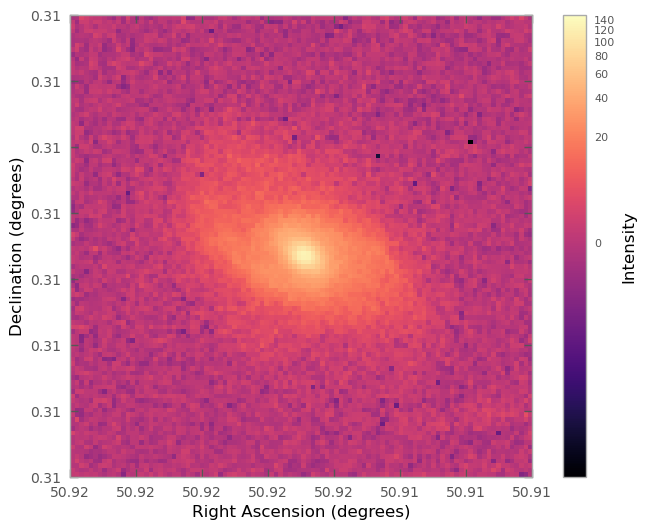

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm

plt.style.use(astropy_mpl_style)


fits_image_filename = 'FITS FILES/J0323+0018.fits'


with fits.open(fits_image_filename) as hdul:
    image_data = hdul[0].data
    wcs = WCS(hdul[0].header)


ysize, xsize = image_data.shape

xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


fig, ax = plt.subplots()


extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
norm = simple_norm(image_data, stretch='log', power = 2.0, asinh_a= 0.22, min_cut = -5, max_cut=150)
im = ax.imshow(image_data, cmap='magma', norm=norm, origin='upper', aspect='equal', extent=extent)


x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


ax.set_xlabel('Right Ascension (degrees)', fontsize=12)  # Specify font size for x-axis label
ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
ax.grid(False)



cbar = plt.colorbar(im, ax=ax, label='Intensity')
cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


plt.show()
#messed around with colorbar to control whcih quantiites will be assigned with max and min


Making of Class and Function

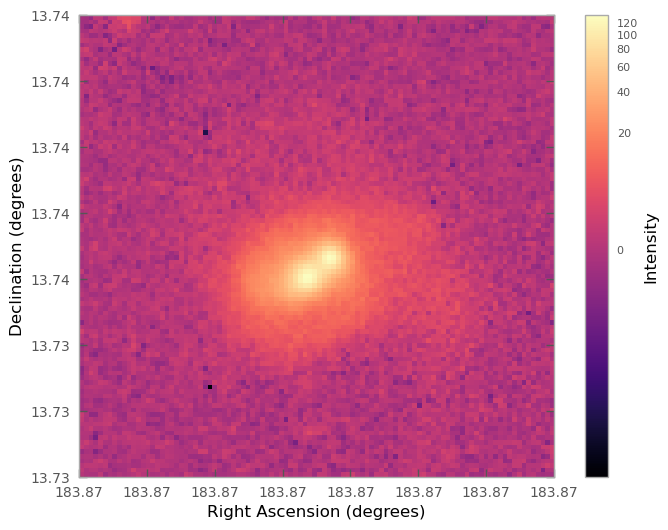

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm


#my main idea is to make a a class that will take a file that will be the input that the use puts in 
#and then this class/function will go through the code I made above and spit out a graph that has good details
#along with the name of the fits file, with important information found in the fits file

class FITS_analyzer:
    def __init__(self, file):
        self.file = file
    def analyze(self):
        with fits.open(self.file) as hdul:
            image_data = hdul[0].data
            wcs = WCS(hdul[0].header)


        ysize, xsize = image_data.shape

        xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


        fig, ax = plt.subplots()


        extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
        norm = simple_norm(image_data, stretch='log', power=2.0, asinh_a=0.5)
        im = ax.imshow(image_data, cmap='magma', norm=norm, origin='upper', aspect='equal', extent=extent)


        x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
        y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)

        ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
        ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
        ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


        ax.set_xlabel('Right Ascension (degrees)', fontsize=12)  # Specify font size for x-axis label
        ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
        ax.grid(False)



        cbar = plt.colorbar(im, ax=ax, label='Intensity')
        cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
        cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


file_path = 'FITS FILES/agn.fits' #had to use relative path, need to update class so that any input(from downloads) will be able to output
analyzer = FITS_analyzer(file_path)
analyzer.analyze()
    
    
            


